# Report

## Pipeline

### Data Collection
- Data was collected from csv and formatted accordingly

### EDA
- Checking the distribution and count of the features

### Splitting
- Splitting the data into train, val, test sets

### EDA
1. Checking the distribution of the data after splitting
2. Analysis of the data
    - Univariate
        1. QQ Plot
        2. Box Whisker Plot
        3. 7-point Summary
    - Bivariate
        1. Facet Plot
    - Multivariate
        1. Pair Plot
        2. Heatmap

### Feature Preprocessing
1. Missing Value Interpretaion
2. Outlier Treatment
    - Visualization
    - Transformation
    - Removal

### Encoding
1. Label Encoding
2. One Hot Encoding

### Modelling
1. Logistic Regression
2. SVM
3. Decision Tree

### Accuracy

#### With no transformation
- <strong>Logistic Regression</strong> 
    - Accuracy on Validation Set: 0.75625
    - Accuracy on Test Set: 0.73

- <strong>SVM</strong>
    - Accuracy on Validation Set: 0.74375
    - Confusion matrix for Validation Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 119       | 1         |
| 2    | 40        | 0         |

    - Accuracy on Test Set: 0.705
    - Confusion matrix for Test Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 141       | 0         |
| 2    | 58        | 0         |

- <strong>Decision Tree</strong> 
    - Accuracy on Validation Set: 0.69375
    - Confusion matrix for Validation Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 90        | 30        |
| 2    | 19        | 21        |

    - Accuracy on Test Set: 0.675
    - Confusion matrix for Test Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 108       | 33        |
| 2    | 32        | 27        |

#### With partial transformation
- <strong>Logistic Regression</strong>
    - Accuracy on Validation Set: 0.7875
    - Accuracy on Test Set: 0.73

- <strong>SVM</strong> <br>
    - Accuracy on Validation Set: 0.75625
    - Confusion matrix for Validation Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 119       | 1         |
| 2    | 38        | 2         |

    - Accuracy on Test Set: 0.72
    - Confusion matrix for Test Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 135       | 6         |
| 2    | 50        | 9         |

- <strong>Decision Tree</strong>
    - Accuracy on Validation Set: 0.71875
    - Confusion matrix for Validation Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 93        | 27        |
| 2    | 18        | 22        |

    - Accuracy on Test Set: 0.7
    - Confusion matrix for Test Set

|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 110       | 31        |
| 2    | 29        | 30        |


#### With full transformation
- <strong>Logistic Regression</strong>
    - Accuracy on Validation Set: 0.7625
    - Accuracy on Test Set: 0.72

- <strong>SVM</strong>
    - Accuracy on Validation Set: 0.81875
    - Confusion matrix for Validation Set

|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 117       | 13        |
| 2    | 26        | 14        |

    - Accuracy on Test Set: 0.73
    - Confusion matrix for Test Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 135       | 6         |
| 2    | 48        | 11        |

- <strong>Decision Tree</strong>
    - Accuracy on Validation Set: 0.7
    - Confusion matrix for Validation Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 91        | 29        |
| 2    | 19        | 21        |
    
    - Accuracy on Test Set: 0.69
    - Confusion matrix for Test Set
    
|      | Predicted | Predicted |
|------|-----------|-----------|
| True | 1         | 2         |
| 1    | 109       | 32        |
| 2    | 30        | 29        |

## Top Features
- Amount
- Credit History
- Checking Ac 
- Age
- Duration

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
%matplotlib inline

# Retrieve data function

Retrieving data from csv, adding columns, changing the datatype of categorial columns and loading it into pandas dataframe

In [326]:
def get_data():
    columns = ["checking_ac", "duration", "credit_history", "purpose", "amount", "saving_ac",
           "employment_status", "installment_rate", 'personal_status_sex', "debtor_guarantor", "residence_since",
          "property", "age", "installment_plan", "housing", "existing_credits", "job", "liable_count", "telephone",
          "foreign_worker", "target"]
    df = pd.read_csv("./german.data2.csv", delimiter=' ', index_col=False, names=columns)
    
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) < 11:
            cat_cols.append(col)
            df[col]=df[col].astype('category')
    return df

def dist_plot(df, col_name):
    plt.title(i)
    sns.distplot(df[col_name])
    plt.show()
    
def count_plot(df, col_name):
    plt.title(i)
    sns.countplot(df[col_name])
    plt.show()
    
def count_cat_plot(df, col_name):
    sns.countplot(x=col_name, hue="target", data=df, dodge=False)
    plt.show()

def qq_plot(df, col_name):
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name)
    plt.show()
    
def box_plot(df, col_name):
    sns.boxplot(df[col_name])
    plt.title(col_name)
    plt.show()
    
def facet_plot(df, row, col, over):
    g = sns.FacetGrid(df, col=col, row=row)
    g_map = g.map(plt.hist, over)
    
def pair_plot(df):
    sns.pairplot(df)
    
def heatmap(df):
    sns.heatmap(df.corr())
    
def left_skew_removal(df, col_name):
    df[col_name] = np.sqrt(df[col_name])
    return df[col_name]

def right_skew_removal(df, col_name):
    df[col_name] = np.log(df[col_name])
    return df[col_name]

def remove_outlier(df, col_name):

    q75, q25 = np.percentile(df[col_name], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)

    for indx, val in df[col_name].iteritems():
        if val < min_v:
            df[col_name][indx] = min_v
        elif val > max_v:
            df[col_name][indx] = max_v
            
    plt.subplot('211')
    dist_plot(df, col_name)
    plt.subplot('212')
    box_plot(df, col_name)
    plt.show()

Seperating the numerical and categorial columns for EDA

In [327]:
pd.options.display.max_columns = 999
df = get_data()
columns = df.columns;
num_cols = list(df.iloc[:, :-1]._get_numeric_data().columns)
cat_cols = list(set(columns) - set(num_cols))

# EDA

## Distribution Plot

Distribution plot for all the numerial features

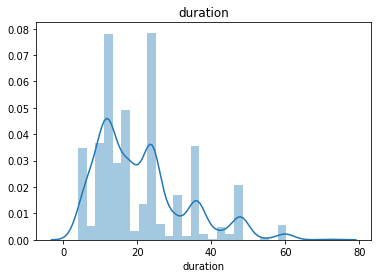

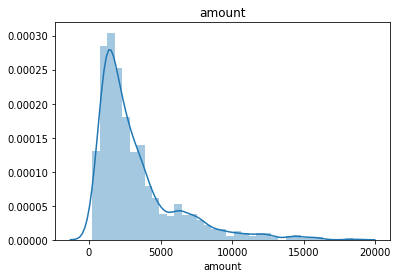

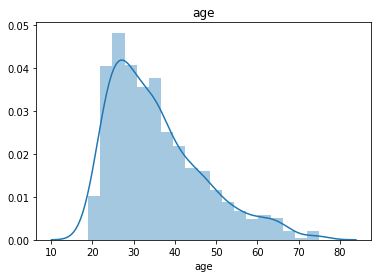

In [328]:
for i in num_cols:
    dist_plot(df, i)

## Count Plot

Count plot for all categorial features

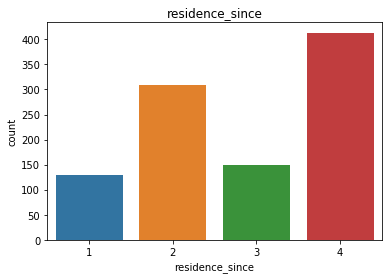

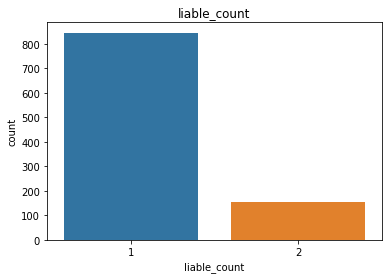

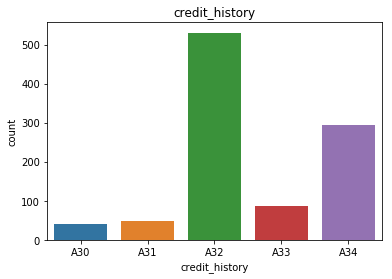

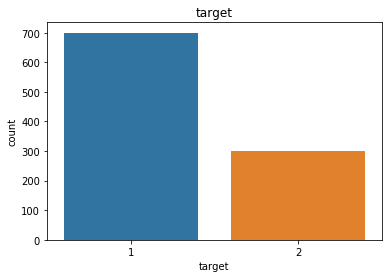

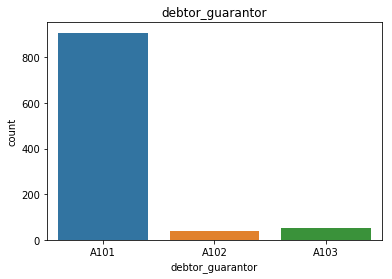

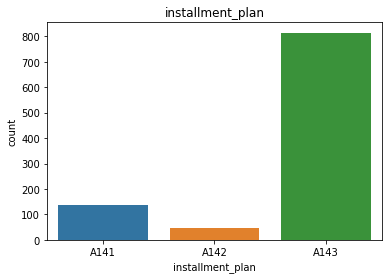

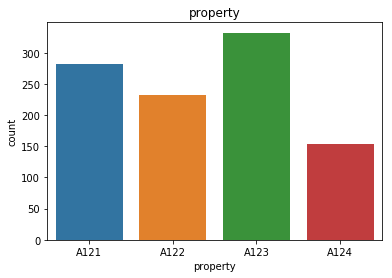

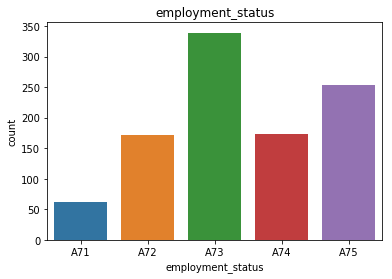

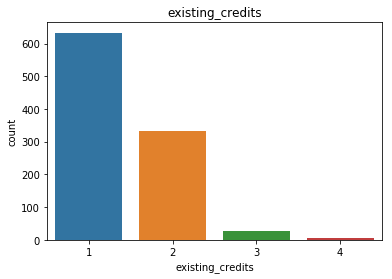

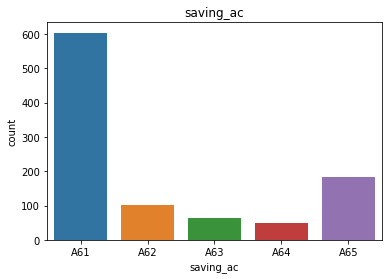

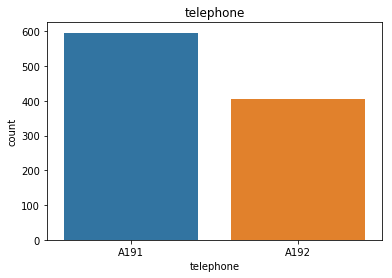

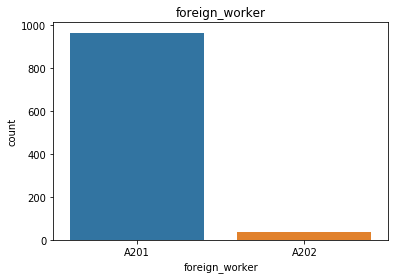

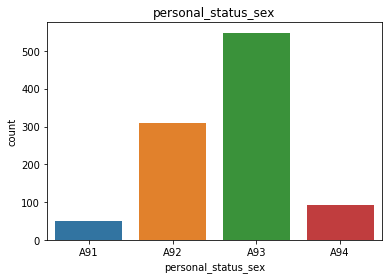

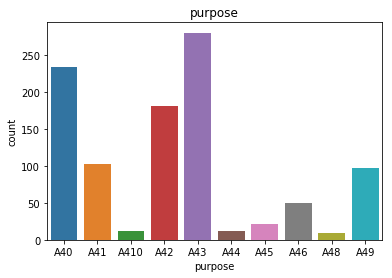

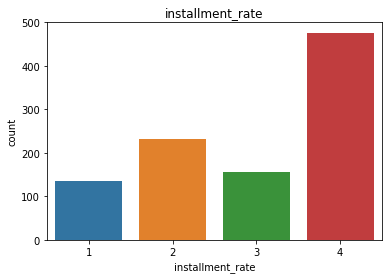

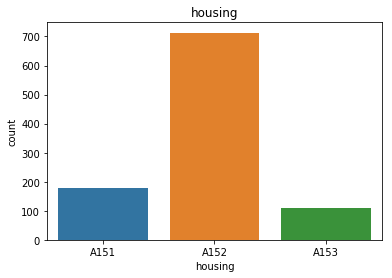

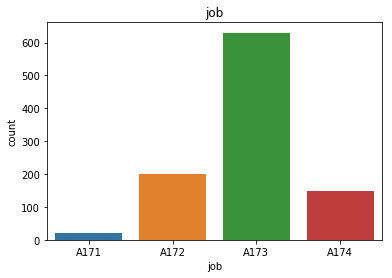

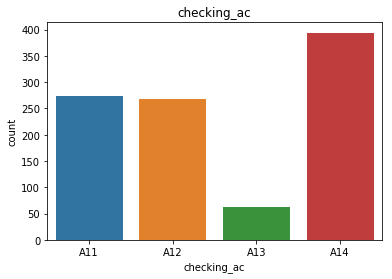

In [329]:
for i in cat_cols:
    count_plot(df, i)
    

## Count vs Category Plot

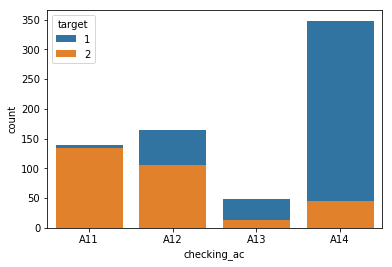

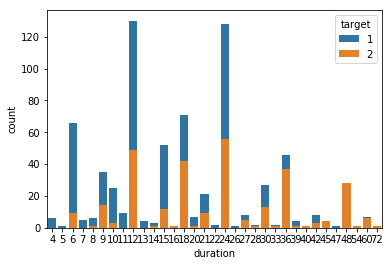

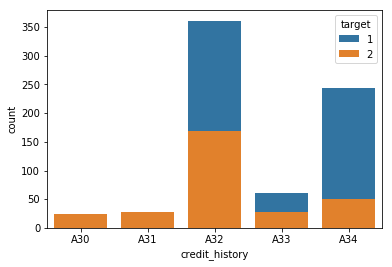

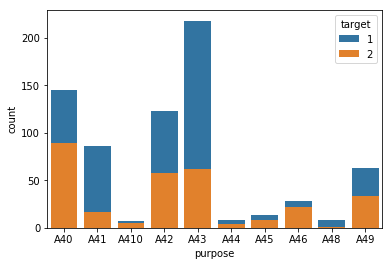

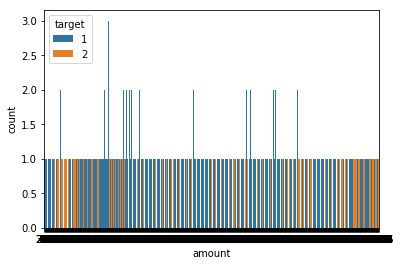

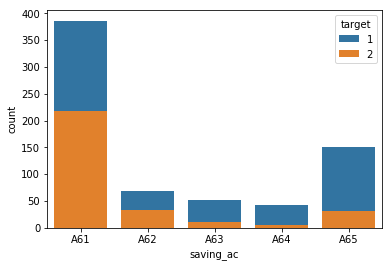

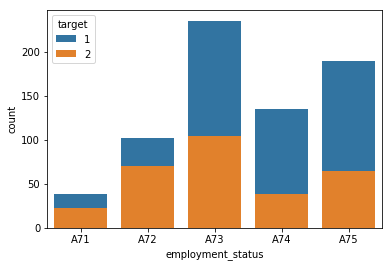

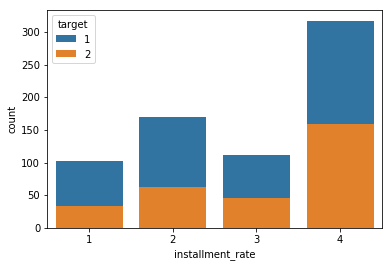

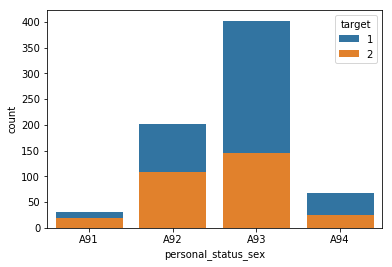

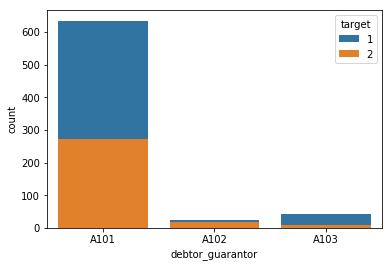

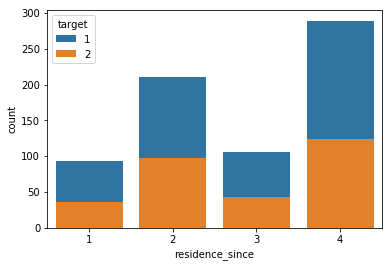

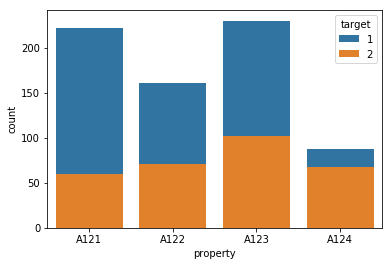

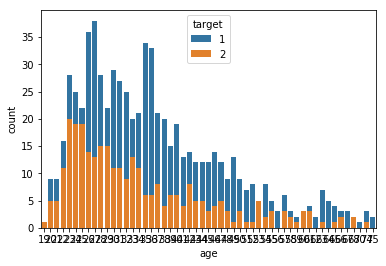

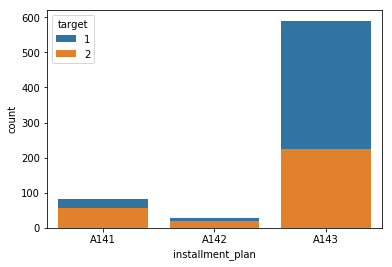

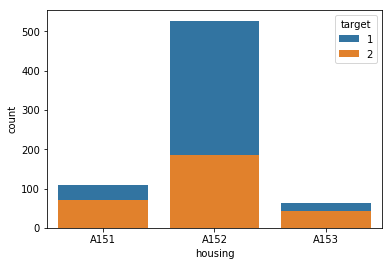

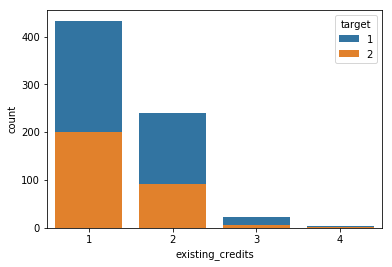

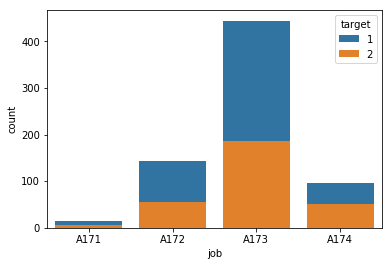

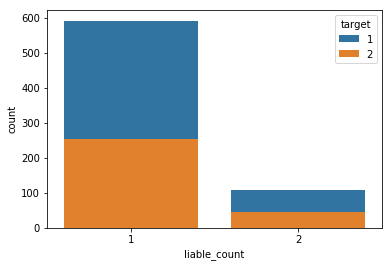

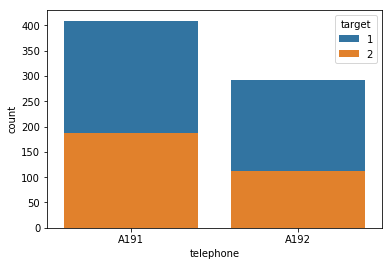

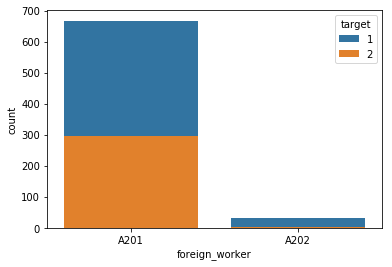

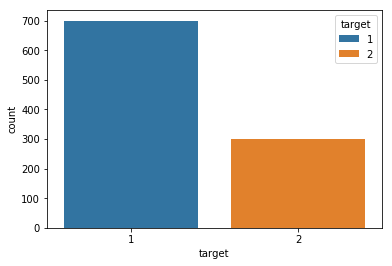

In [330]:
for i in df.columns:
    count_cat_plot(df, i)

# Splitting

Splitting the data into train val test set (64%, 16%, 20%)

In [331]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, 20:21], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Shapes of the sets

In [332]:
print("X Train: " + str(X_train.shape))
print("Y Train: " + str(y_train.shape))

print("X Test: " + str(X_test.shape))
print("Y Test: " + str(y_test.shape))

print("X Val: " + str(X_val.shape))
print("Y Val: " + str(y_val.shape))

X Train: (640, 20)
Y Train: (640, 1)
X Test: (200, 20)
Y Test: (200, 1)
X Val: (160, 20)
Y Val: (160, 1)


In [333]:
num_cols_x_train = list(X_train._get_numeric_data().columns)
cat_cols_x_train = list(set(X_train.columns) - set(num_cols))

## Distribution Plot

Distribution after splitting

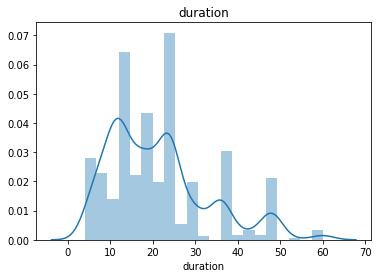

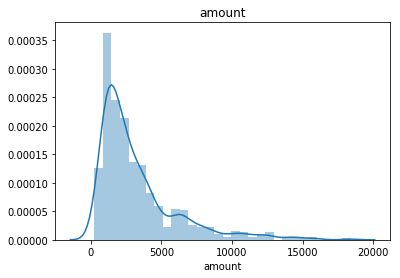

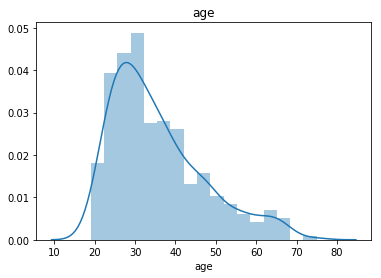

In [334]:
for i in num_cols_x_train:
    dist_plot(X_train, i)

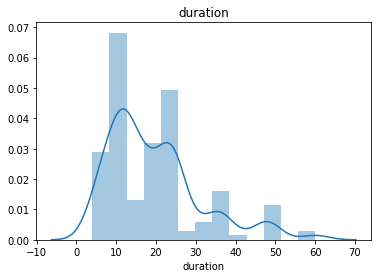

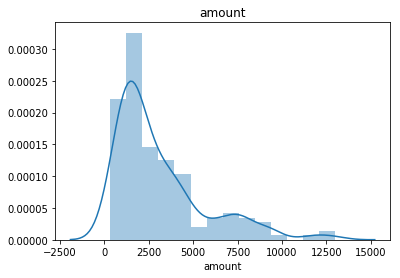

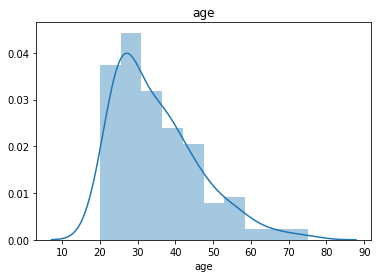

In [335]:
for i in num_cols_x_train:
    dist_plot(X_val, i)

# EDA after Splitting

## Univariate Analysis

### Q-Q Plot

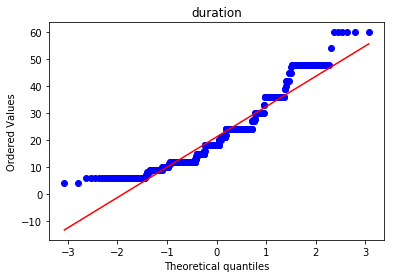

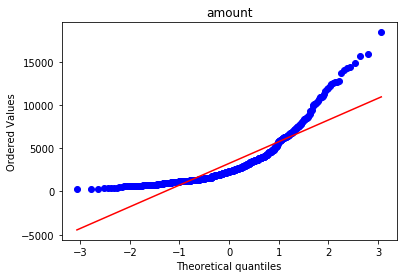

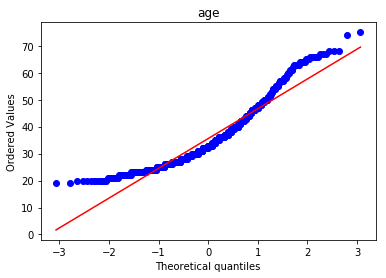

In [336]:
for i in num_cols_x_train:
    qq_plot(X_train, i)

### Box Whisker Plot

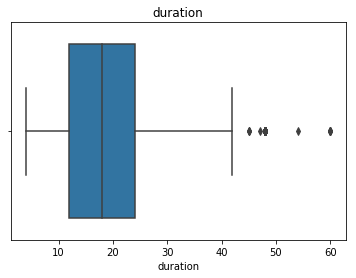

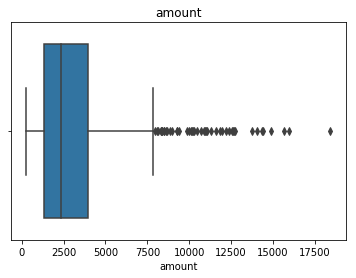

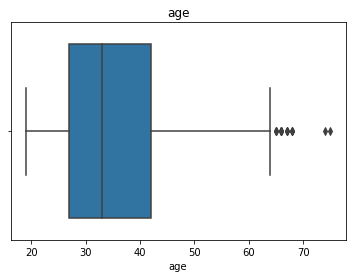

In [337]:
for i in num_cols_x_train:
    box_plot(X_train, i)

### 7-point Summary

In [338]:
X_train.describe()

,duration,amount,age
count,640.000000,640.000000,640.000000
mean,21.181250,3247.370313,35.589062
std,11.749803,2819.879502,11.508242
min,4.000000,250.000000,19.000000
25%,12.000000,1341.500000,27.000000
50%,18.000000,2322.500000,33.000000
75%,24.000000,3959.000000,42.000000
max,60.000000,18424.000000,75.000000


### Standard Deviation

In [339]:
std_dev = X_train.std(axis=0)
print(std_dev)

duration      11.749803
amount      2819.879502
age           11.508242
dtype: float64


## Bivariate Analysis

### Facet Plot

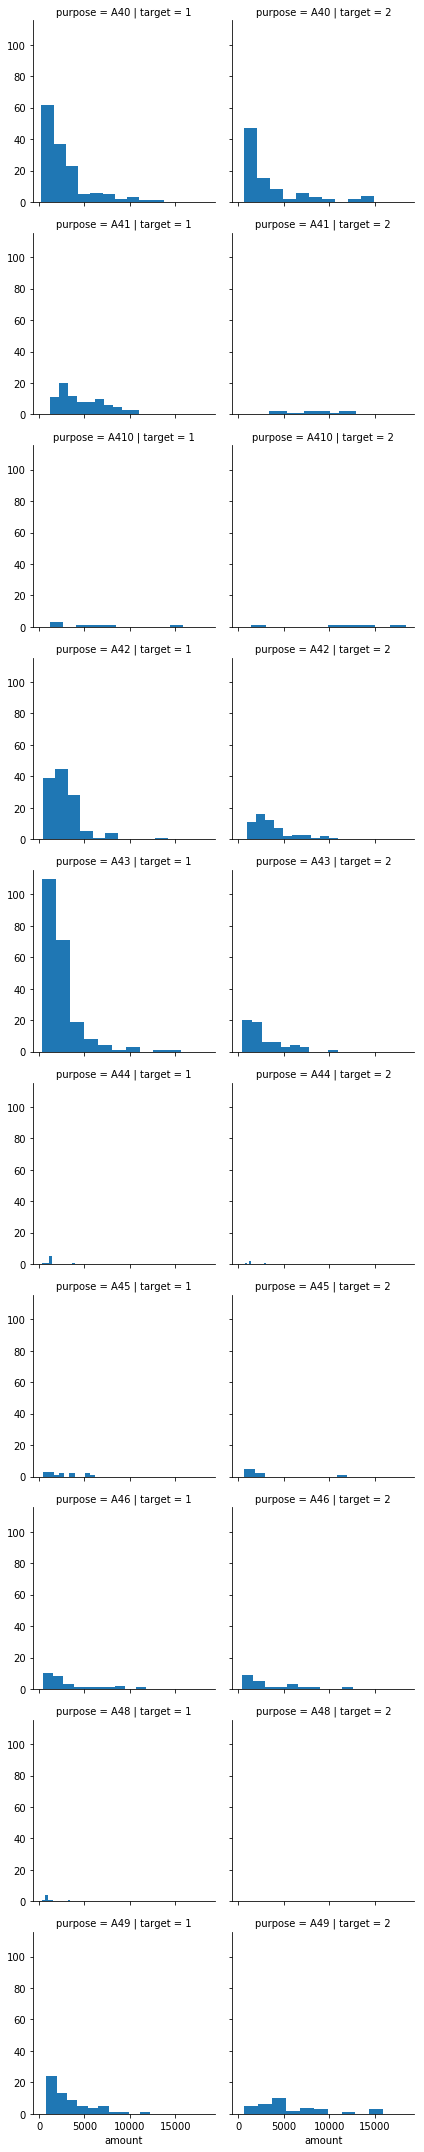

In [340]:
facet_plot(df, 'purpose', 'target', 'amount')

## Multivariate Analysis

### Pair Plot

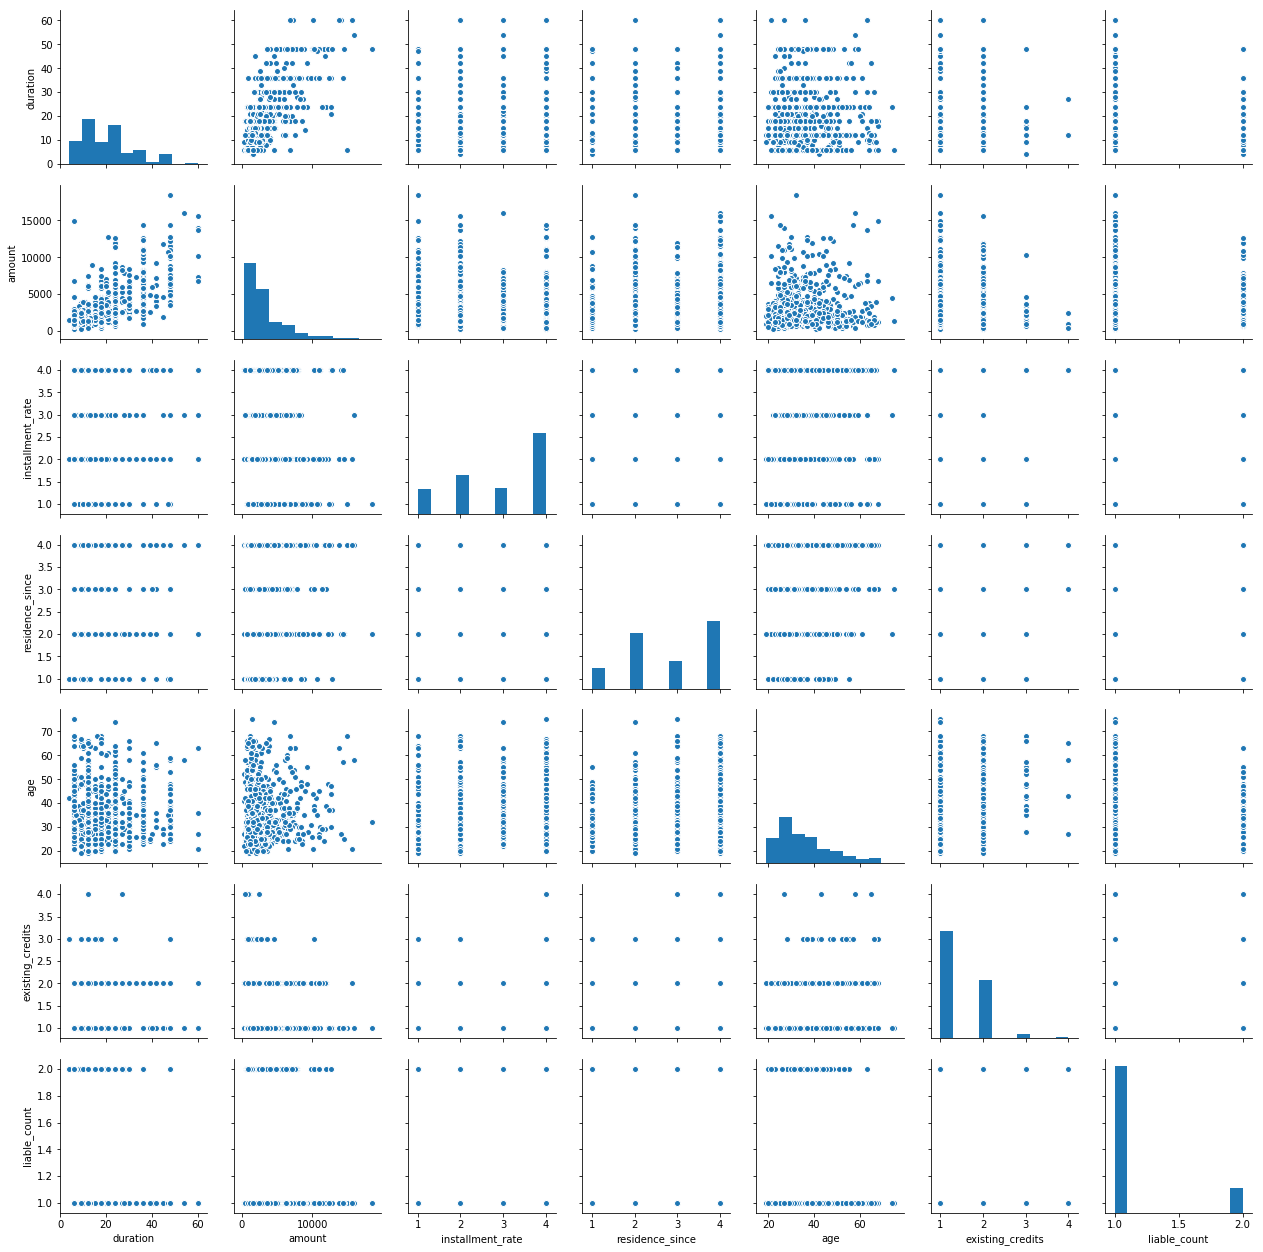

In [341]:
pair_plot(X_train)

## Heatmap

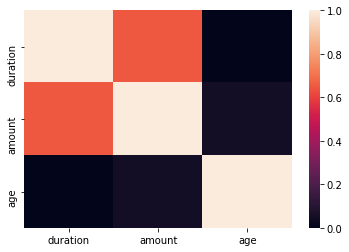

In [342]:
heatmap(X_train)

# Feature Preprocessing

## Missing Value Interpretation

Check for missing values

In [343]:
missing_val = X_train.isnull().sum()
print(missing_val)

checking_ac            0
duration               0
credit_history         0
purpose                0
amount                 0
saving_ac              0
employment_status      0
installment_rate       0
personal_status_sex    0
debtor_guarantor       0
residence_since        0
property               0
age                    0
installment_plan       0
housing                0
existing_credits       0
job                    0
liable_count           0
telephone              0
foreign_worker         0
dtype: int64


## Outliers Treatment

### KDE Plot

Plotting iqr over the distribution

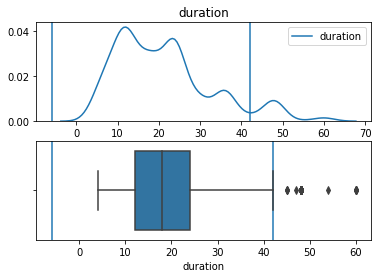

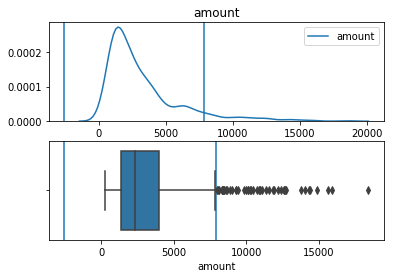

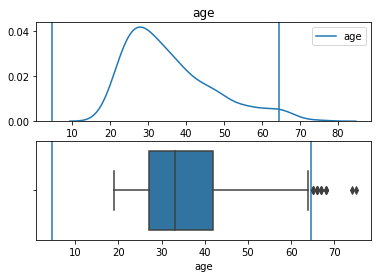

In [344]:
for i in num_cols_x_train:
    q75, q25 = np.percentile(X_train[i], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)
    
    plt.subplot(211)
    plt.title(i)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.kdeplot(X_train[i])
    plt.subplot(212)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.boxplot(X_train[i])

    plt.show()
    

### Transformation

Applying transformation to treat outliers

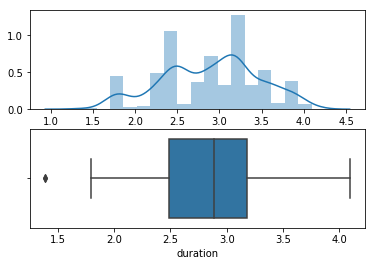

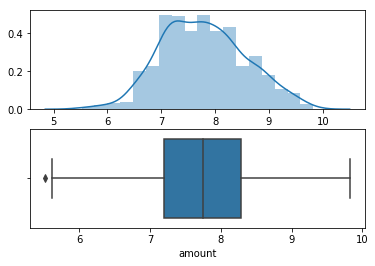

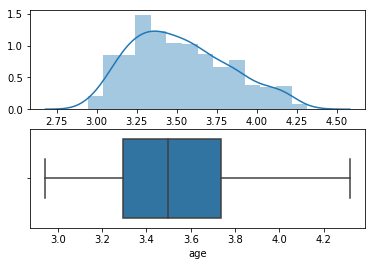

In [345]:
right_skew_removal(X_train, 'duration')
right_skew_removal(X_test, 'duration')
right_skew_removal(X_val, 'duration')

plt.subplot('211')
sns.distplot(X_train['duration'])
plt.subplot('212')
sns.boxplot(X_train['duration'])
plt.show()

right_skew_removal(X_train, 'amount')
right_skew_removal(X_test, 'amount')
right_skew_removal(X_val, 'amount')

plt.subplot('211')
sns.distplot(X_train['amount'])
plt.subplot('212')
sns.boxplot(X_train['amount'])
plt.show()

right_skew_removal(X_train, 'age')
right_skew_removal(X_test, 'age')
right_skew_removal(X_val, 'age')

plt.subplot('211')
sns.distplot(X_train['age'])
plt.subplot('212')
sns.boxplot(X_train['age'])
plt.show()

### Outliers Removal

Atlast remove all the outliers after transformation

/home/ubuntu/miniconda/envs/credit/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


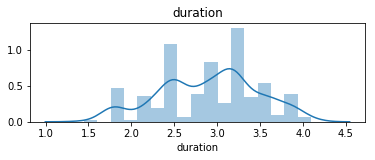

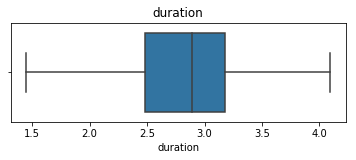

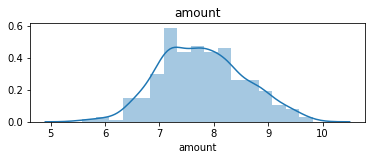

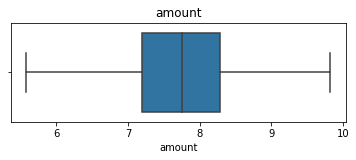

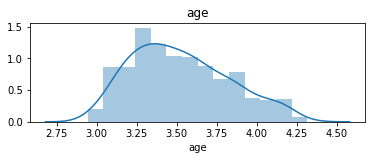

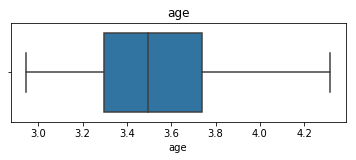

In [346]:
for i in num_cols_x_train:
    remove_outlier(X_train, i)

# Encoding

Encoding numeric and categorical values

In [347]:
checking_ac = {
    'A11': 0,
    'A14': 1,
    'A12': 2,
    'A13': 3
}

saving_ac = {
    'A61': 0,
    'A64': 1,
    'A62': 2,
    'A63': 3,
    'A64': 4,
    'A65': 5
}

employment_status = {
    'A71' : 0,
    'A72' : 1,
    'A73' : 2,
    'A74' : 3,
    'A75' : 4
}

job = {
    'A171': 0,
    'A172': 1,
    'A173': 2,
    'A174': 3
}

telephone = {
    'A191': 0,
    'A192': 1
}

foreign_worker = {
    'A201': 0,
    'A202': 1
}

In [348]:
cat_cols = []
for col in X_train.columns:
    if len(X_train[col].unique()) < 11:
        cat_cols.append(col)
        X_train[col]=X_train[col].astype('category')

level_encoding_cols = ["checking_ac", "saving_ac", "employment_status", "installment_rate", "job", "residence_since", "liable_count", "existing_credits", 'telephone', 'foreign_worker']
one_hot_encoding_cols = list(set(cat_cols_x_train) - set(level_encoding_cols))

## Label Encoding

In [349]:
x_col = {'checking_ac': checking_ac, 'saving_ac': saving_ac, 'employment_status': employment_status, 'job': job, 'telephone': telephone, 'foreign_worker': foreign_worker}
for indx, val in x_col.items():
    col = indx
    rep_dict = val
    X_train[col].replace(rep_dict, inplace=True)
    X_val[col].replace(rep_dict, inplace=True)
    X_test[col].replace(rep_dict, inplace=True)

In [350]:
X_val.head()

,checking_ac,duration,credit_history,purpose,amount,saving_ac,employment_status,installment_rate,personal_status_sex,debtor_guarantor,residence_since,property,age,installment_plan,housing,existing_credits,job,liable_count,telephone,foreign_worker
340,2,3.178054,A34,A46,8.655737,0,1,2,A92,A101,4,A124,3.178054,A143,A153,2,2,1,1,0
500,0,3.178054,A32,A40,8.046549,0,1,4,A92,A101,1,A122,3.295837,A143,A152,1,2,1,0,0
118,0,3.496508,A34,A42,8.361942,3,2,1,A92,A101,4,A123,3.135494,A143,A152,2,2,1,0,0
792,1,1.791759,A34,A42,7.107425,5,2,1,A94,A101,2,A122,3.295837,A143,A152,2,2,1,0,0
635,1,2.484907,A32,A46,7.239215,0,4,4,A93,A101,4,A122,3.850148,A141,A152,3,2,2,1,0


## One Hot Encoding

In [351]:
def one_hot_encoding(train, val, test, col_name):
    x = pd.get_dummies(train[col_name])
    y = pd.get_dummies(test[col_name])
    z = pd.get_dummies(val[col_name])
    for i in x.columns:
        train[col_name + ' is ' + i + '?'] = x[i]
        
    for i in z.columns:
        val[col_name + ' is ' + i + '?'] = z[i]
        
    for i in y.columns:
        test[col_name + ' is ' + i + '?'] = y[i]

    train.drop(col_name, axis=1, inplace=True)
    val.drop(col_name, axis=1, inplace=True)
    test.drop(col_name, axis=1, inplace=True)

In [352]:
for i in one_hot_encoding_cols:
    one_hot_encoding(X_train, X_val, X_test, i)

In [353]:
X_val.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,property is A121?,property is A122?,property is A123?,property is A124?,housing is A151?,housing is A152?,housing is A153?
340,2,3.178054,8.655737,0,1,2,4,3.178054,2,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
500,0,3.178054,8.046549,0,1,4,1,3.295837,1,2,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
118,0,3.496508,8.361942,3,2,1,4,3.135494,2,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
792,1,1.791759,7.107425,5,2,1,2,3.295837,2,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
635,1,2.484907,7.239215,0,4,4,4,3.850148,3,2,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [354]:
X_test.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,property is A121?,property is A122?,property is A123?,property is A124?,housing is A151?,housing is A152?,housing is A153?
507,2,2.708050,8.832004,2,0,1,2,3.526361,1,3,2,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
818,0,3.583519,9.671366,0,0,2,3,3.761200,1,3,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
452,1,2.484907,7.922624,0,4,2,4,3.526361,2,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
368,0,3.583519,8.144969,0,4,4,2,3.737670,1,2,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
242,0,3.871201,8.434898,0,4,3,4,3.178054,2,2,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


## Normalizing the data

In [355]:
norm_X_train = preprocessing.normalize(X_train)
norm_X_test = preprocessing.normalize(X_test)

In [356]:
X_val.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,property is A121?,property is A122?,property is A123?,property is A124?,housing is A151?,housing is A152?,housing is A153?
340,2,3.178054,8.655737,0,1,2,4,3.178054,2,2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
500,0,3.178054,8.046549,0,1,4,1,3.295837,1,2,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
118,0,3.496508,8.361942,3,2,1,4,3.135494,2,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
792,1,1.791759,7.107425,5,2,1,2,3.295837,2,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
635,1,2.484907,7.239215,0,4,4,4,3.850148,3,2,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


# Modeling

## Logistic Regression

In [357]:
def plot_features(X_train, X_test, y_train, y_test, model):
    accuracies = []
    features = []
    plt.figure(figsize=(15,15))
    for idx, feature in enumerate(X_train.columns):
        model = model
        model.fit(pd.DataFrame(X_train[feature]), y_train.values.ravel())
        y_pred = model.predict(pd.DataFrame(X_test[feature]))
        acc = accuracy_score(y_pred=y_pred, y_true=y_test)
        accuracies.append(acc)
        features.append(feature)

    features = [x for x in sorted(zip(accuracies,features))]
    accuracies = sorted(accuracies)
    plt.title('Feature Importances')
    plt.barh(range(len(accuracies)), accuracies, color='b', align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Relative Importance')
    plt.show()

In [358]:
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

Accuracy on Validation Set: 0.7625
Accuracy on Test Set: 0.72


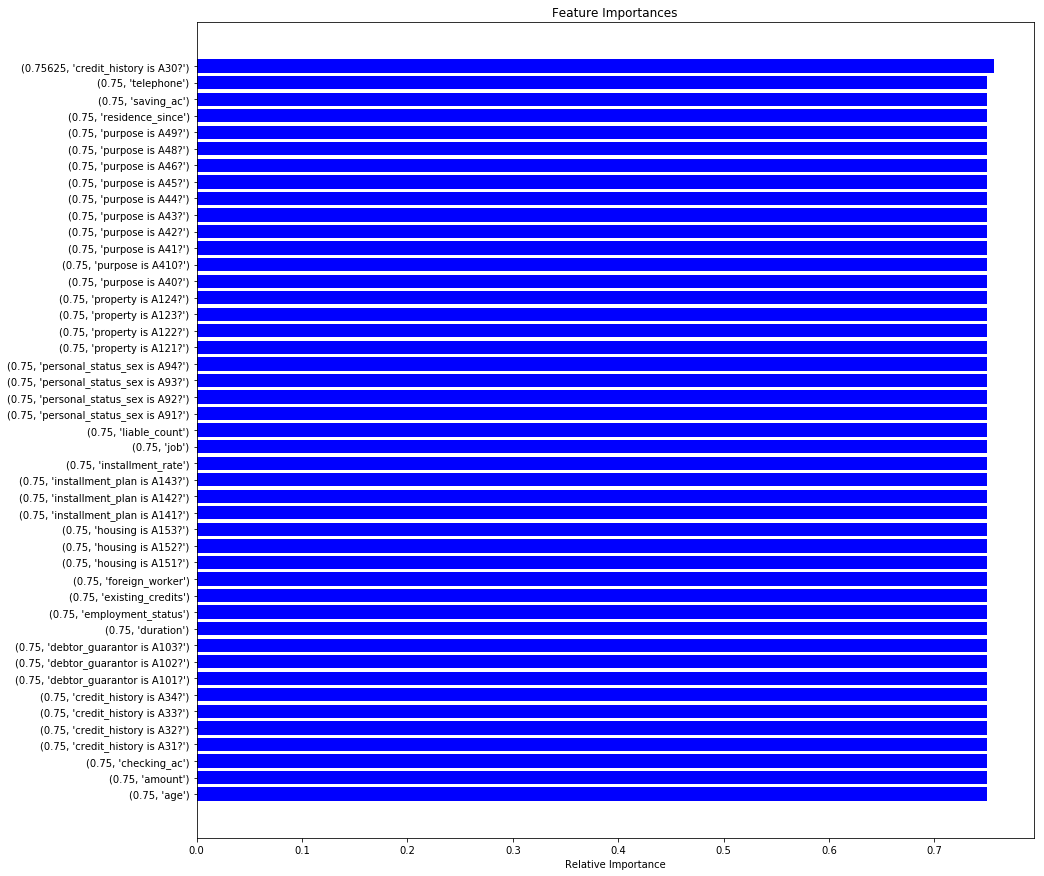

In [400]:
reg = LogisticRegression()
reg.fit(X_train, y_train.values.ravel())
predict = reg.predict(X_val)
acc = accuracy_score(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
predict = reg.predict(X_test)
acc = accuracy_score(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
plot_features(X_train, X_val, y_train, y_val, reg)

## SVM

Accuracy on Validation Set: 0.81875
Confusion matrix for Validation Set
[[117   3]
 [ 26  14]]
Accuracy on Test Set: 0.73
Confusion matrix for Test Set
[[135   6]
 [ 48  11]]


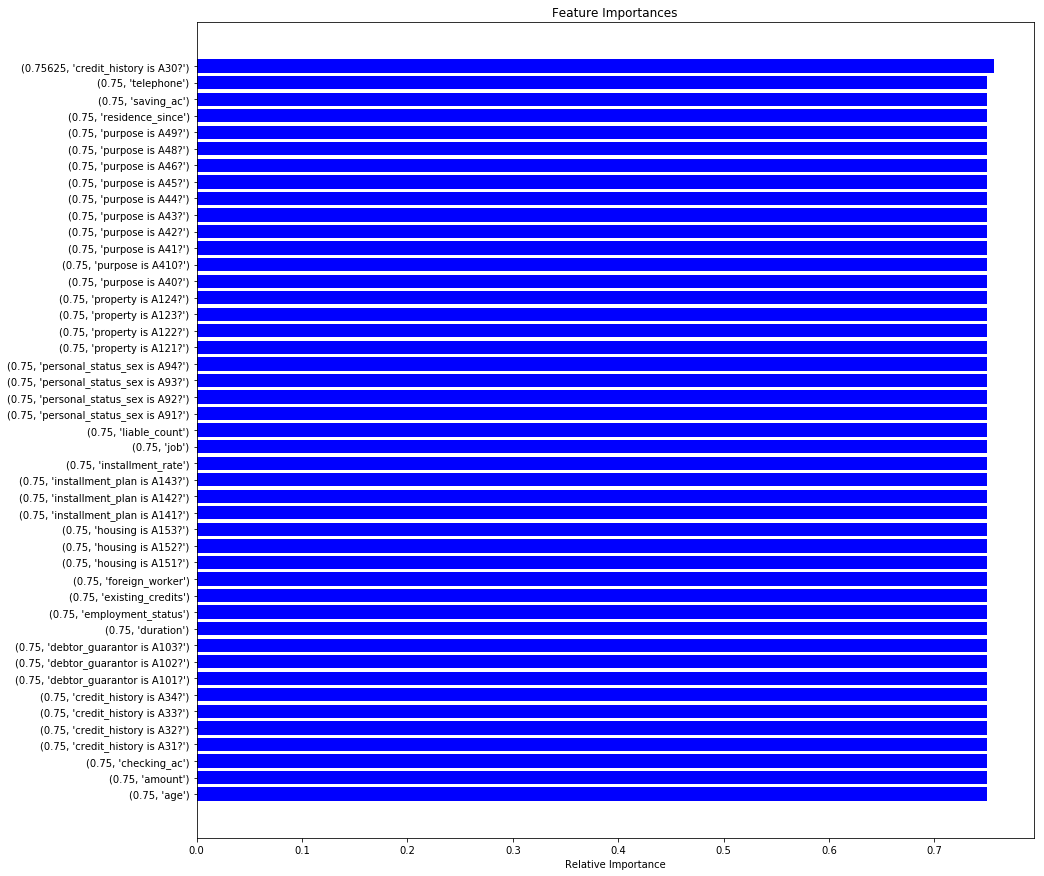

In [399]:
clf = svm.SVC()
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

plot_features(X_train, X_val, y_train, y_val, reg)

# Decision Tree

Accuracy on Validation Set: 0.725
Confusion matrix for Validation Set
[[91 29]
 [15 25]]
Accuracy on Test Set: 0.66
Confusion matrix for Test Set
[[105  36]
 [ 32  27]]


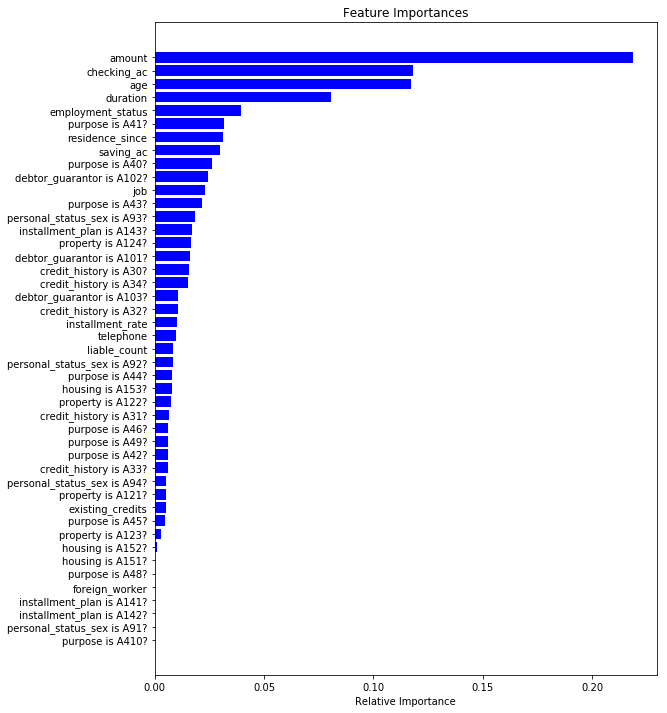

In [396]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [365]:
# a = pd.Series(clf.feature_importances_)
# b = pd.Series(X_train.columns)
# z = pd.DataFrame(data={'column': b, 'value': a})
# # sns.barplot(z)
# z.sort_values(by='value')

## Random Forest

Accuracy on Validation Set: 0.75625
Confusion matrix for Validation Set
[[118   2]
 [ 37   3]]
Accuracy on Test Set: 0.725
Confusion matrix for Test Set
[[137   4]
 [ 51   8]]


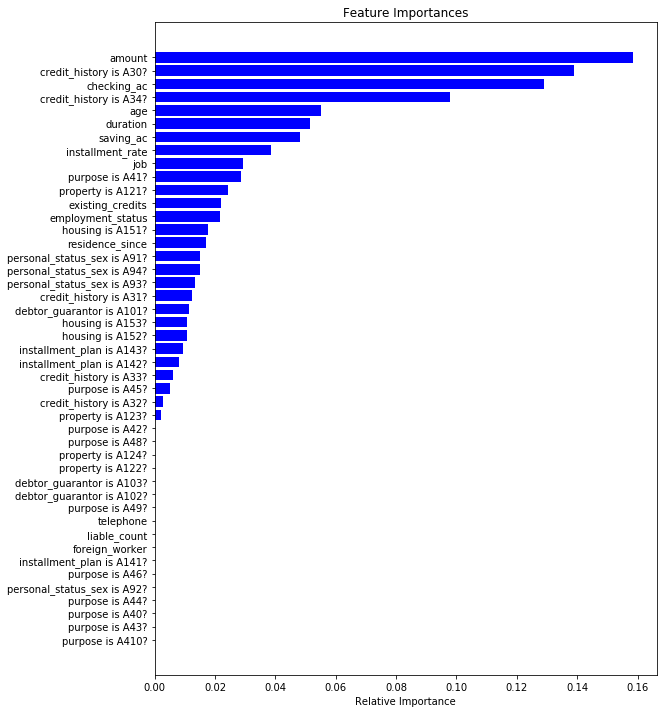

In [392]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


## Gradient Boosting

Accuracy on Validation Set: 0.80625
Confusion matrix for Validation Set
[[107  13]
 [ 18  22]]
Accuracy on Test Set: 0.77
Confusion matrix for Test Set
[[129  12]
 [ 34  25]]


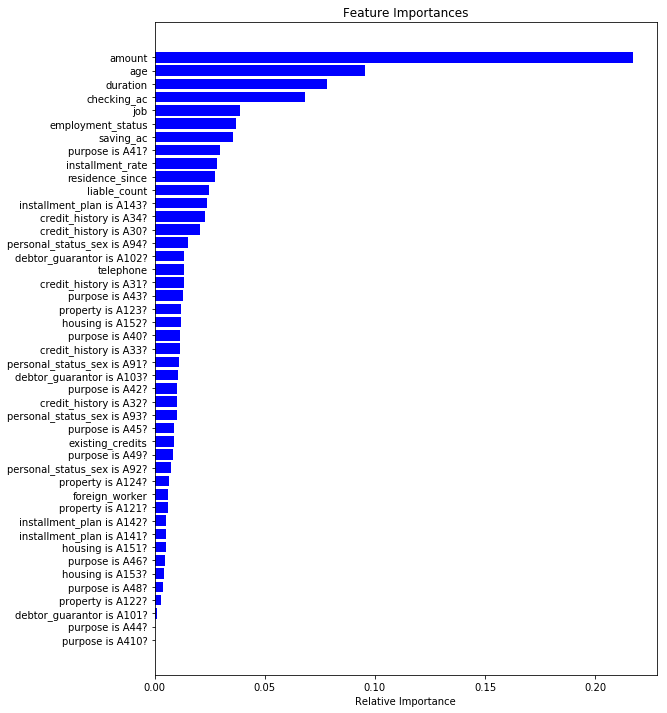

In [395]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


## Ada Boost

Accuracy on Validation Set: 0.78125
Confusion matrix for Validation Set
[[100  20]
 [ 15  25]]
Accuracy on Test Set: 0.725
Confusion matrix for Test Set
[[119  22]
 [ 33  26]]


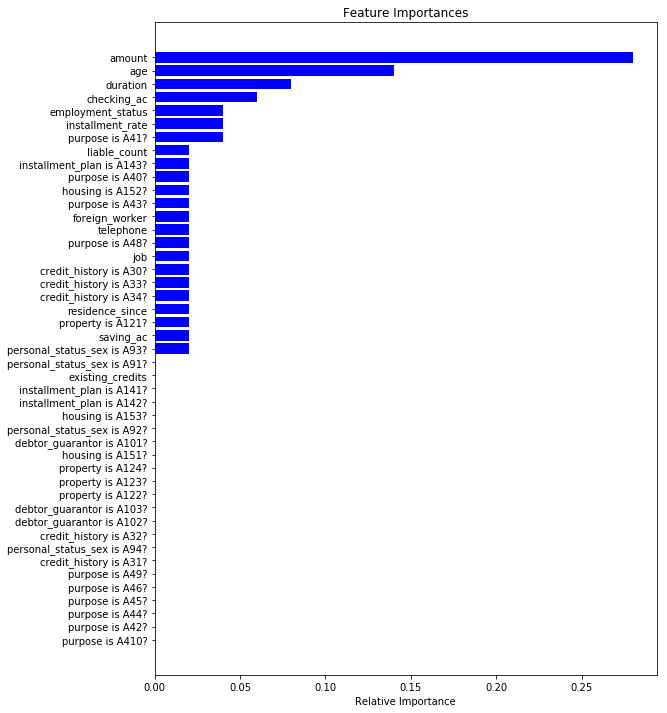

In [401]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()
